## Análisis y Predicción de Precios de Autos (Core)
### Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

- Dataset: Automobile Dataset

#### Descripción del Dataset: Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

## Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

### Content
This data set consists of three types of entities:
- (a) the specification of an auto in terms of various characteristics, 
- (b) its assigned insurance risk rating, 
- (c) its normalized losses in use as compared to other cars. 
- The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

- The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

### Note: Several of the attributes in the database could be used as a "class" attribute.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



### Instrucciones:

### Parte 1: Análisis Exploratorio de Datos (EDA)

 1. Carga y Exploración de Datos:

- Cargar el dataset y revisar la estructura básica.
- Descripción de las variables y su distribución.

In [4]:
df = pd.read_csv('../data/Automobile_data.csv')
print('Vemos las dimensiones del dataset\n',df.shape) #Vemos las dimensiones del dataset
print('Revisamos la estructura') # Revisamos la estructura
df.info()
df

Vemos las dimensiones del dataset
 (205, 26)
Revisamos la estructura
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-o

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
#Solo para copiar los data type y ordenar los tipos de datos segun quiero cambiarlos
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# Reemplazar '?' con NaN para trabajar mejor con el dataset
df.replace('?', np.nan, inplace=True)

# Convertir las columnas a tipos de datos adecuados
# pd.to_numeric(df['columna'], errors='coerce') Convierte las columnas a float, manejando los valores no numéricos como NaN.
'''
bore to float
stroke to float
horsepower to float
peak-rpm to float
price to float
num of doors to float
number of cylinder to categorical and integer
'''
# Lista de columnas a convertir
columns_to_convert = ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price', 'normalized-losses']
# Convertir cada columna a float usando un bucle
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df['num-of-doors'] = df['num-of-doors'].replace({ 'two': 2, 'four': 4 }).astype(float) # Usamos float para manejar posibles NaNs
# Convertir 'num-of-cylinders' a integer y categoría 
cylinders_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders_int'] = df['num-of-cylinders'].map(cylinders_map).astype(float)
df['num-of-cylinders_cat'] = df['num-of-cylinders'].astype('category')

# convertir las columnas Object a category
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_variables] = df[categorical_variables].astype('category')

df.dtypes

C:\Users\diego\AppData\Local\Temp\ipykernel_25584\1955732484.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['num-of-doors'] = df['num-of-doors'].replace({ 'two': 2, 'four': 4 }).astype(float) # Usamos float para manejar posibles NaNs


symboling                  int64
normalized-losses        float64
make                    category
fuel-type               category
aspiration              category
num-of-doors             float64
body-style              category
drive-wheels            category
engine-location         category
wheel-base               float64
length                   float64
width                    float64
height                   float64
curb-weight                int64
engine-type             category
num-of-cylinders        category
engine-size                int64
fuel-system             category
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
num-of-cylinders_int     float64
num-of-cylinders_cat    category
dtype: object

In [7]:
# Vemos datos estadisticos del dataset
print('Vemos datos estadisticos del dataset')
df.describe()

Vemos datos estadisticos del dataset


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-of-cylinders_int
count,205.000000,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,0.834146,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,4.380488
std,1.245307,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.080854
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,2.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,4.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,4.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,4.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,12.000000



- Detección y tratamiento de valores nulos.
- Identificación y tratamiento de outliers.
- Análisis de correlación entre variables.


In [8]:
print('No tenemos valores nulos como vemos en df.info')
df.isnull().sum()

No tenemos valores nulos como vemos en df.info


symboling                0
normalized-losses       41
make                     0
fuel-type                0
aspiration               0
num-of-doors             2
body-style               0
drive-wheels             0
engine-location          0
wheel-base               0
length                   0
width                    0
height                   0
curb-weight              0
engine-type              0
num-of-cylinders         0
engine-size              0
fuel-system              0
bore                     4
stroke                   4
compression-ratio        0
horsepower               2
peak-rpm                 2
city-mpg                 0
highway-mpg              0
price                    4
num-of-cylinders_int     0
num-of-cylinders_cat     0
dtype: int64

In [9]:
# Identificacion y tratamiento de outliers
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [10]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [11]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
symboling,0.0,0.000000,-2.00,3.00
normalized-losses,1.0,0.487805,65.00,231.00
num-of-doors,0.0,0.000000,2.00,4.00
wheel-base,3.0,1.463415,86.60,114.20
length,1.0,0.487805,144.60,208.10
width,8.0,3.902439,60.30,70.90
height,0.0,0.000000,47.80,59.80
curb-weight,0.0,0.000000,1488.00,4066.00
engine-size,10.0,4.878049,61.00,203.00
bore,0.0,0.000000,2.54,3.94


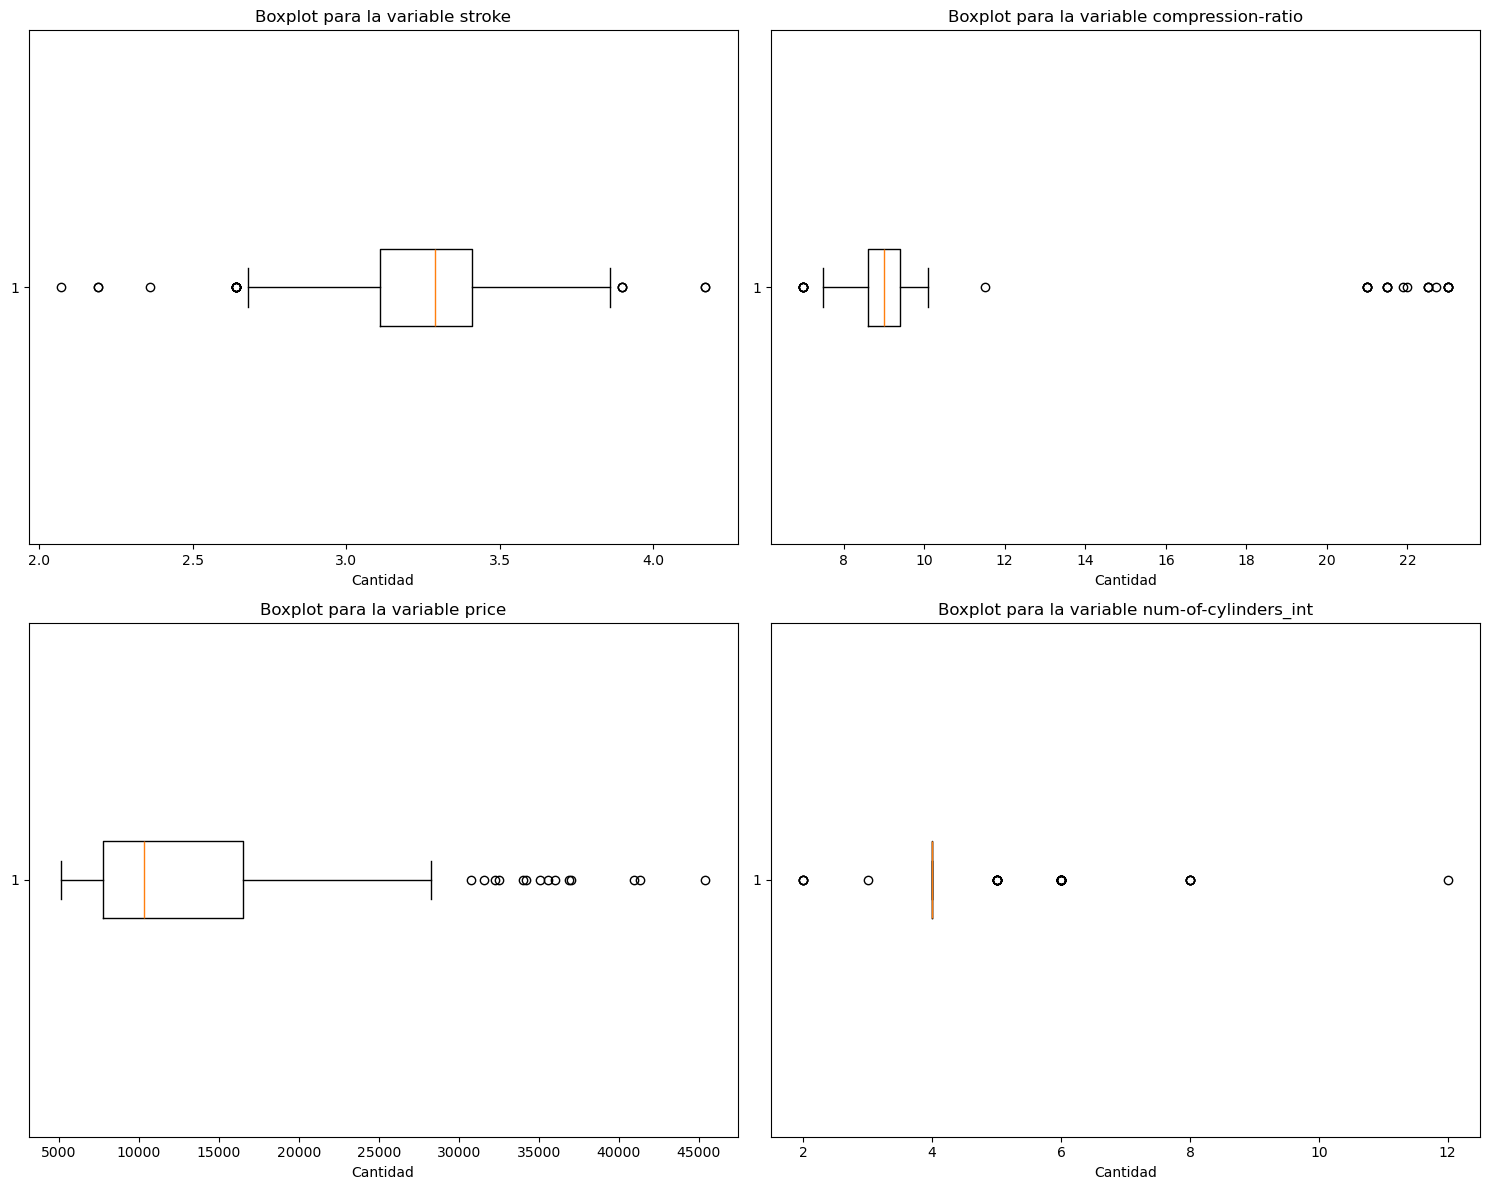

In [12]:
# Identify columns with more than 5% of outliers
columns_with_outliers = outliers_summary.columns[outliers_summary.loc['Percentage of Outliers'] > 5]
# Filter the original DataFrame to include only these columns
df_outliers = df[columns_with_outliers]
# Create separate box plots for each column with more than 5% outliers in a 2x2 grid
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_outliers[column].dropna(), vert=False)
    plt.title(f"Boxplot para la variable {column}")
    plt.xlabel("Cantidad")
plt.tight_layout()
plt.show()

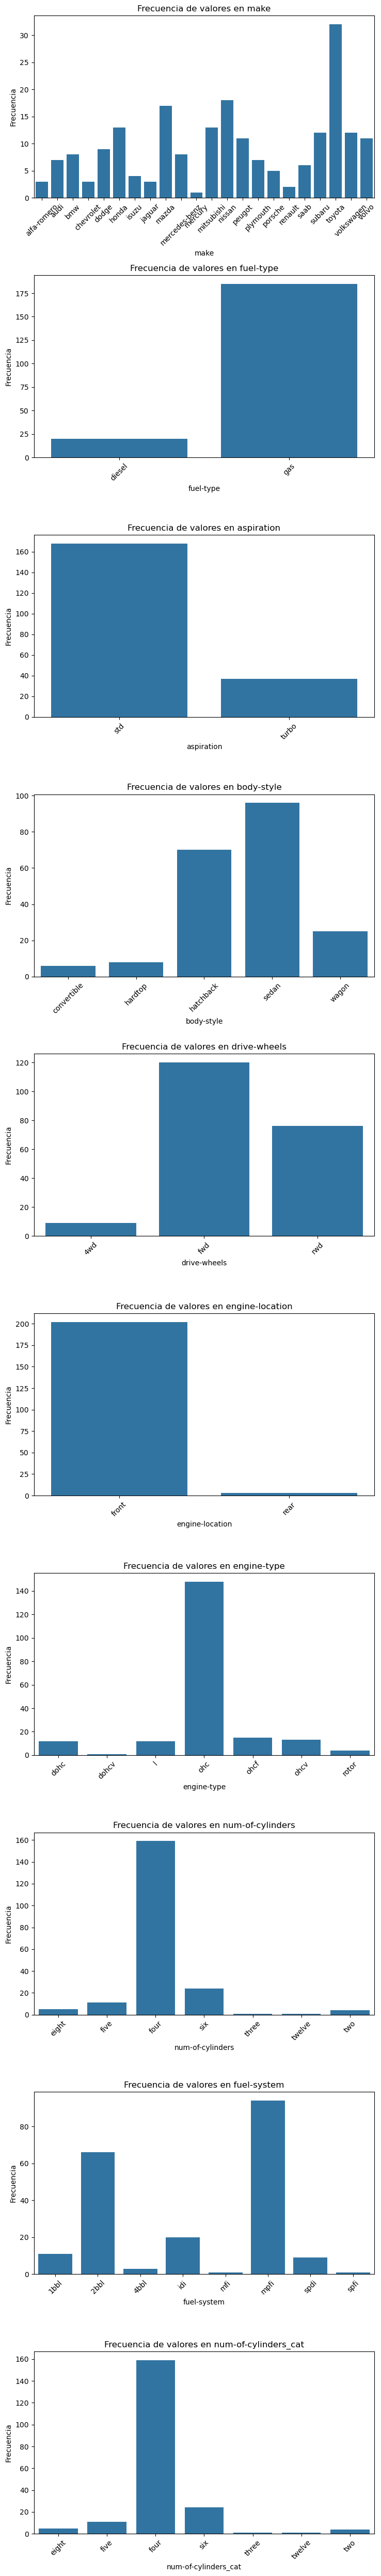

In [13]:
# Identificar columnas categoricas
categorical_columns = df.select_dtypes(include='category').columns
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(categorical_columns)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

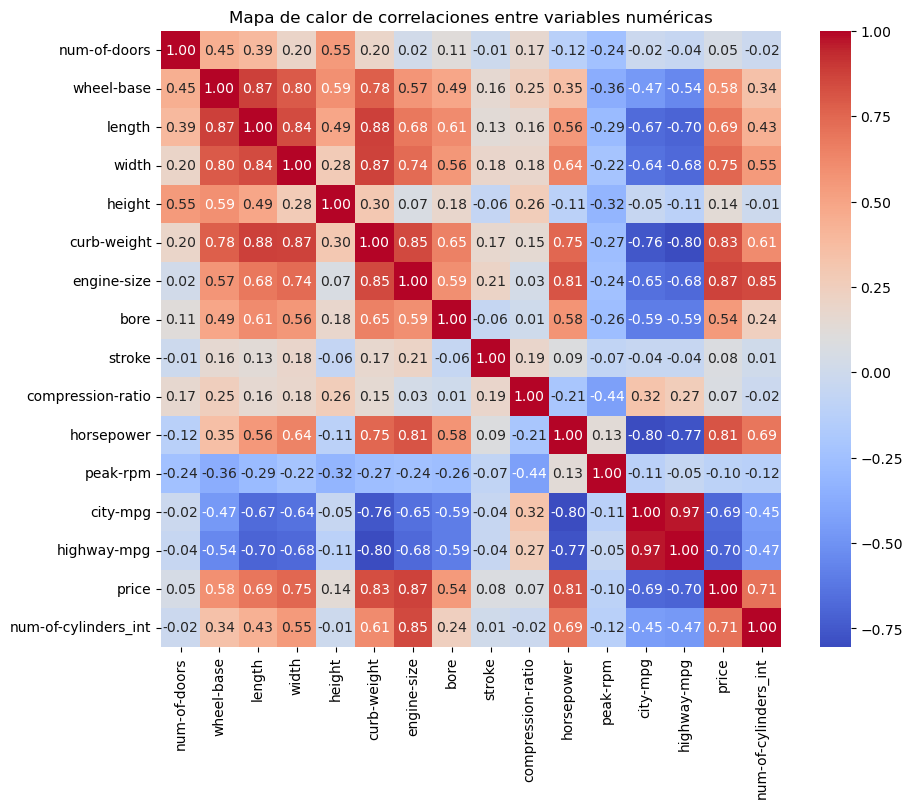

In [14]:
correlacion = ['num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-cylinders_int']
corr_matrix = df[correlacion].corr()
# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

In [15]:
df.dtypes

symboling                  int64
normalized-losses        float64
make                    category
fuel-type               category
aspiration              category
num-of-doors             float64
body-style              category
drive-wheels            category
engine-location         category
wheel-base               float64
length                   float64
width                    float64
height                   float64
curb-weight                int64
engine-type             category
num-of-cylinders        category
engine-size                int64
fuel-system             category
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
num-of-cylinders_int     float64
num-of-cylinders_cat    category
dtype: object

In [16]:
def calculate_na_statistics(df):
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na = pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %', ascending=False)

print(calculate_na_statistics(df))

                      datos sin NAs en q  Na en q  Na en %
normalized-losses                    164       41    20.00
price                                201        4     1.95
stroke                               201        4     1.95
bore                                 201        4     1.95
num-of-doors                         203        2     0.98
peak-rpm                             203        2     0.98
horsepower                           203        2     0.98
symboling                            205        0     0.00
num-of-cylinders                     205        0     0.00
num-of-cylinders_int                 205        0     0.00
highway-mpg                          205        0     0.00
city-mpg                             205        0     0.00
compression-ratio                    205        0     0.00
fuel-system                          205        0     0.00
engine-size                          205        0     0.00
engine-type                          205        0     0.

In [17]:
df.fillna(value={'price': 0}, inplace=True)

In [18]:
# Crear un modelo de regresión para predecir los valores faltantes
'''model = LinearRegression()

# Seleccionar las filas sin valores nulos para entrenar el modelo
train_data = df.dropna(subset=['columna', 'columna_relacionada'])
X_train = train_data[['columna_relacionada']]
y_train = train_data['columna']

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores faltantes
missing_data = df[df['columna'].isnull()]
X_missing = missing_data[['columna_relacionada']]
df.loc[df['columna'].isnull(), 'columna'] = model.predict(X_missing)'''

"model = LinearRegression()\n\n# Seleccionar las filas sin valores nulos para entrenar el modelo\ntrain_data = df.dropna(subset=['columna', 'columna_relacionada'])\nX_train = train_data[['columna_relacionada']]\ny_train = train_data['columna']\n\n# Entrenar el modelo\nmodel.fit(X_train, y_train)\n\n# Predecir los valores faltantes\nmissing_data = df[df['columna'].isnull()]\nX_missing = missing_data[['columna_relacionada']]\ndf.loc[df['columna'].isnull(), 'columna'] = model.predict(X_missing)"


### Parte 2: Preparación de Datos

 2. Preprocesamiento:

- Selección de características importantes.
- Transformación de variables categóricas.
- División del conjunto de datos en entrenamiento y prueba.
- Escalado de características.


In [34]:
# Separar variables predictoras y objetivo
X = df[['num-of-cylinders_int', 'highway-mpg', 'city-mpg','horsepower', 'engine-size', 'drive-wheels', 'body-style', 'num-of-cylinders', 'fuel-system']]
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definir las columnas numéricas y categóricas
numeric_features = ['num-of-cylinders_int', 'highway-mpg', 'city-mpg','horsepower', 'engine-size']
categorical_features = ['drive-wheels', 'body-style', 'fuel-system']


# Crear transformadores para cada subconjunto de columnas
# Creamos StandardScaler para el escalado.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
    ])
# Creamos un OneHotEncoder para las columnas categóricas.
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creamos un ColumnTransformer que aplica los transformadores a sus respectivos subconjuntos de columnas.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])




### Parte 3: Modelos de Regresión

 3. Regresión Lineal:

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).



 4. K-Nearest Neighbors (KNN):

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).


 5. Árbol de Decisión:

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).

In [35]:

# Preprocesar los datos de entrenamiento y prueba
X_train_imputed = preprocessor.fit_transform(X_train)
X_test_imputed = preprocessor.transform(X_test)
# Crear y entrenar los modelos 
# Modelo de Regresión Lineal 
modelo_regresion = LinearRegression() 
modelo_regresion.fit(X_train_imputed, y_train) 
y_pred_regresion = modelo_regresion.predict(X_test_imputed) 
# Modelo KNN
modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_train_imputed, y_train)
y_pred_knn = modelo_knn.predict(X_test_imputed) 
# Modelo de Árbol de Decisión
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train_imputed, y_train) 
y_pred_arbol = modelo_arbol.predict(X_test_imputed)

# Evaluación de los modelos en el conjunto de prueba
# Métricas para Regresión Lineal
mae_regresion = mean_absolute_error(y_test, y_pred_regresion)
mse_regresion = mean_squared_error(y_test, y_pred_regresion)
r2_regresion = r2_score(y_test, y_pred_regresion) 
print("Resultados en el conjunto de prueba - Regresión Lineal:") 
print(f"Error Cuadrático Medio (MSE): {mse_regresion:.2f}") 
print(f"Coeficiente de Determinación (R²): {r2_regresion:.2f}") 
print(f"Error Absoluto Medio (MAE): {mae_regresion:.2f}\n") 
# Métricas para KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn) 
mse_knn = mean_squared_error(y_test, y_pred_knn) 
r2_knn = r2_score(y_test, y_pred_knn) 
print("Resultados en el conjunto de prueba - KNN:") 
print(f"Error Cuadrático Medio (MSE): {mse_knn:.2f}") 
print(f"Coeficiente de Determinación (R²): {r2_knn:.2f}") 
print(f"Error Absoluto Medio (MAE): {mae_knn:.2f}\n") 
# Métricas para Árbol de Decisión
mae_arbol = mean_absolute_error(y_test, y_pred_arbol) 
mse_arbol = mean_squared_error(y_test, y_pred_arbol) 
r2_arbol = r2_score(y_test, y_pred_arbol) 
print("Resultados en el conjunto de prueba - Árbol de Decisión:") 
print(f"Error Cuadrático Medio (MSE): {mse_arbol:.2f}") 
print(f"Coeficiente de Determinación (R²): {r2_arbol:.2f}") 
print(f"Error Absoluto Medio (MAE): {mae_arbol:.2f}")

Resultados en el conjunto de prueba - Regresión Lineal:
Error Cuadrático Medio (MSE): 31257860.12
Coeficiente de Determinación (R²): 0.54
Error Absoluto Medio (MAE): 3469.18

Resultados en el conjunto de prueba - KNN:
Error Cuadrático Medio (MSE): 24870352.82
Coeficiente de Determinación (R²): 0.63
Error Absoluto Medio (MAE): 2551.39

Resultados en el conjunto de prueba - Árbol de Decisión:
Error Cuadrático Medio (MSE): 32242351.76
Coeficiente de Determinación (R²): 0.53
Error Absoluto Medio (MAE): 2985.69




### Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

- Comparar los resultados de los tres modelos en términos de MSE y R².
- Discusión sobre las diferencias en el rendimiento de los modelos.
- Conclusión


### Interpretación:
- KNN: Parece ser el mejor modelo en términos de MSE, MAE y R². Tiene el menor error cuadrático medio y error absoluto medio, y un coeficiente de determinación más alto, lo que sugiere que es el modelo más preciso y que explica mejor la variabilidad en los datos.

- Regresión Lineal: Tiene el mayor MSE y MAE, y el menor R², indicando que es el modelo menos preciso entre los tres.

- Árbol de Decisión: Se sitúa en un punto intermedio entre KNN y regresión lineal, con un rendimiento que es mejor que la regresión lineal pero no tan bueno como el KNN.

### Conclusión:

El modelo KNN está mostrando un rendimiento superior, pero siempre hay espacio para mejorar. Implementar algunas de estas recomendaciones puede ayudarte a obtener resultados más precisos y robustos.



 7. Interpretación de Resultados:

- Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
- Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
- Tareas Adicionales y Desafíos

 8. Desafíos Adicionales:

- Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
- Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
- Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
- Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.